In [4]:
%pip install numpy pandas matplotlib seaborn --quiet

In [2]:
%pip install jovian opendatasets graphviz scikit-learn plotly --upgrade --quiet


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import pandas as pd

In [14]:
iris_df = pd.read_csv('iris_data.csv')

In [7]:
import csv

# Open the CSV file
with open('people.csv', mode='r') as file:
    # Create a CSV reader object
    csv_reader = csv.reader(file)
    
    # Skip the header row
    next(csv_reader)
    
    # Read and print each row
    for row in csv_reader:
        print(f"Name: {row[0]}, Age: {row[1]}, Location: {row[2]}")


Name: John, Age: 25, Location: New York
Name: Alice, Age: 30, Location: London
Name: Bob, Age: 22, Location: Sydney
Name: Charlie, Age: 28, Location: San Francisco


In [8]:
people = pd.read_csv('people.csv')

In [9]:
people.head()

,Name,Age,Location
0,John,25,New York
1,Alice,30,London
2,Bob,22,Sydney
3,Charlie,28,San Francisco


In [15]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

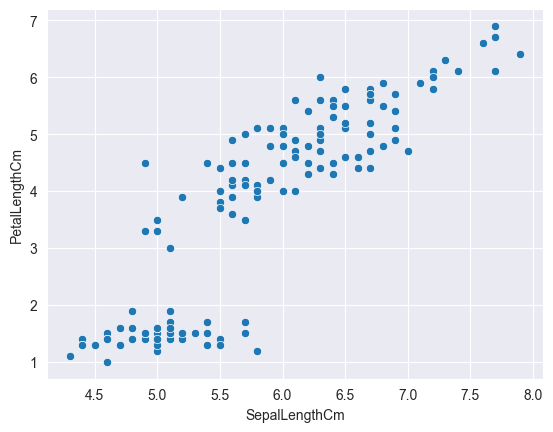

In [19]:
sns.scatterplot(data=iris_df, x='SepalLengthCm', y='PetalLengthCm')

<Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

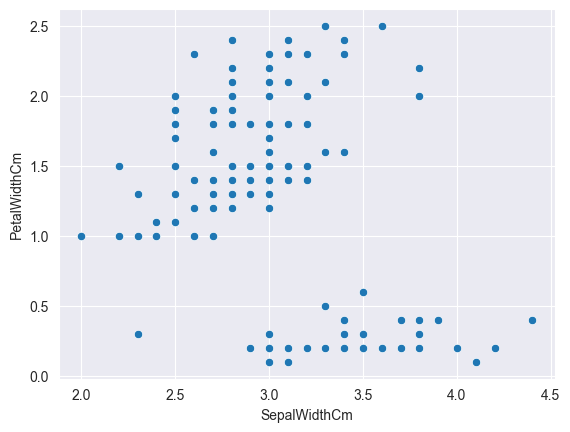

In [22]:
sns.scatterplot(data=iris_df, x='SepalWidthCm', y='PetalWidthCm')

We will attempt to cluster observations using numeric columns in the data

In [23]:
numeric_cols= ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [24]:
x = iris_df[numeric_cols]

In [25]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


K-means algorithm
1- Pick K random objects as the initial cluster cernters.
2- Classify each point into the cluster whos center is closest to the point.
3- For each cluster of classified objects, compute the centroid(mean).
4 Reclassify each point using the mean as the new centroieds for each cluster.
5- calculate the totale varience of each cluster (low varience means that the points are close to each other, high varience is the oposite, variance is the measure of spread of the points).
6- repeat the steps 1 to 5 multible times and pick the cluster with the lowest total varience.


Applying K_means to the data set

In [26]:
from sklearn.cluster import KMeans

In [29]:
model = KMeans(n_clusters=3, random_state=42)

In [30]:
model.fit(x)

KMeans(n_clusters=3, random_state=42)

In [32]:
#We can find the cluster centers for each cluster 

In [35]:
model.cluster_centers_ # it will pick 4 values as we have 4 dimenstions in our data set.

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

Now we can calculate the clusters.

In [36]:
pred = model.predict(x)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

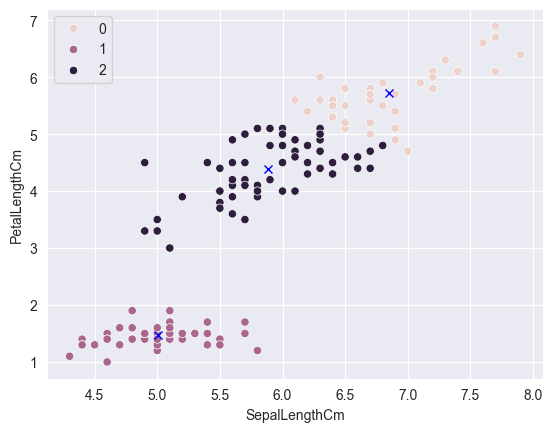

In [38]:
sns.scatterplot(data=x, x = 'SepalLengthCm', y='PetalLengthCm', hue=pred); centers_x, centers_y =model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, 'xb')

In [39]:
# we can check the goodness of the model (varience) by looking at model.inertia_
model.inertia_

78.94506582597731

In [41]:
# we can try to creat 6 clusters
model = KMeans(n_clusters=6, random_state=42).fit(x)

In [43]:
pred = model.predict(x)
pred

array([1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 5, 1, 1, 1, 5, 5, 5, 1, 5, 5, 5, 5,
       1, 1, 1, 1, 1, 5, 1, 1, 1, 5, 5, 5, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1,
       5, 1, 5, 1, 5, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 4, 0, 3, 4, 4, 3, 2, 3, 4, 3,
       4, 4, 4, 0, 4, 4, 4, 3, 3, 0, 4, 0, 3, 0, 4, 3, 0, 0, 4, 3, 3, 3,
       4, 0, 0, 3, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0], dtype=int32)

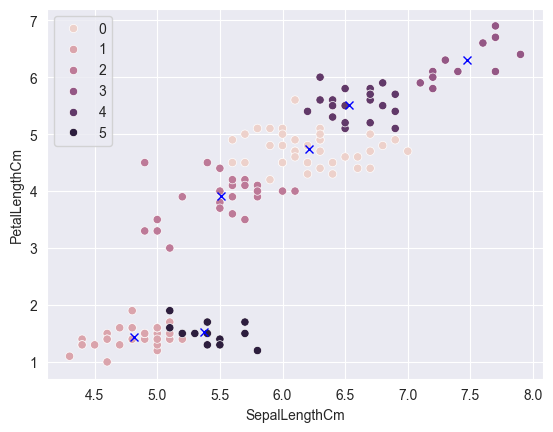

In [45]:
#see the grapf of the model
sns.scatterplot(data=x, x= 'SepalLengthCm', y='PetalLengthCm', hue=pred); centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, 'xb')

In [46]:
model.inertia_ #lower inertia means better model (clusterings)

39.251830892636775

Creating number of clusters vs. inertia to get the right number of clusters.

Text(0, 0.5, 'Inertia')

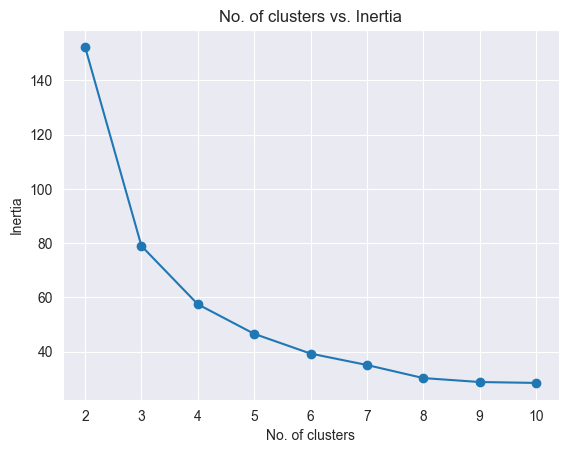

In [55]:
# this code will creat an elbow curve graph
options = range(2,11)
inertias = []

for n_clusters in options:
    model=KMeans(n_clusters,random_state=42).fit(x)
    inertias.append(model.inertia_)

plt.title('No. of clusters vs. Inertia')
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
# the point at which the curve starts to flatten out is the optimal number of clusters.

DBSCAN 

Density-based spatial clustering of applications with noise, it uses the density of points in a region to form clusters. it has two parameters: 'epsilon', and 'min samples', using which it classifies each point as a core point, reachable point or noise point(outlier).

In [57]:
from sklearn.cluster import DBSCAN

In [73]:
model = DBSCAN(eps=4 , min_samples=100)

In [74]:
model.fit(x)

DBSCAN(eps=4, min_samples=100)

in DBSCAN there is no prediction step. It directly assigns labels to all the inputs. hence it can't be used for new observations.

In [75]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [76]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [71]:
# to check what atributies we have 
dir(model)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'algorithm',
 'components_',
 'core_sample_indices_',
 'eps',


In [77]:
# to check the core samples 
model.core_sample_indices_

array([  5,   7,   9,  10,  11,  15,  17,  18,  19,  20,  21,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  34,  37,  39,  43,  44,  46,
        48,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 106, 108, 110, 111, 112, 113, 114, 115, 116,
       119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133,
       134, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149])

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

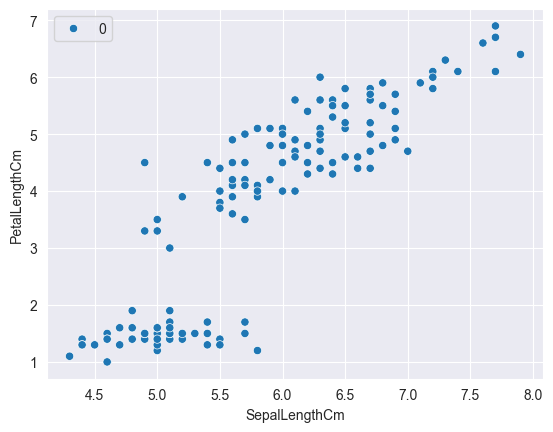

In [78]:
sns.scatterplot(data=x, x= 'SepalLengthCm', y='PetalLengthCm', hue=model.labels_)

Comparison:

K_meas: 1- we can specify the number of clusters.

2- the cluster is made by measuring the distance between the point and the centroied.

3- we can use it to classify new points.

DBSCAN: 1- number of clusters will be automatically calculated for us, we can only pick eps an min_samples.

2- the cluster is made by measuring the distance between the points.

Hirarchical clustering

--> creats a tree of clusters 

1- It marks each point in the data set as a cluster.

2- Picks two closest cluster centers without a parent and compine them into a new cluster.

3- the new cluster is the parent of the two clusters, and it's center is the mean of all the points in the cluster.

4- Repeat steps 2 and 3 till there is just one cluster left.


PCA

In [79]:
iris_df = pd.read_csv('iris_data.csv')
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [80]:
# we only use the numeric columns 
numeric_cols

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [81]:
from sklearn.decomposition import PCA

In [82]:
pca = PCA(n_components=2) # set the number of dimensions

In [84]:
pca.fit(iris_df[numeric_cols])


PCA(n_components=2)

In [85]:
# to project the points to the new dimensions
iris2_pca = pca.transform(iris_df[numeric_cols])

<Axes: >

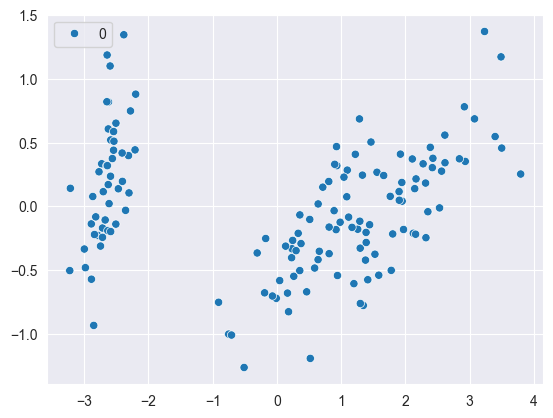

In [92]:
# see the graph of the new dimensions
sns.scatterplot(x=iris2_pca[:,0], y=iris2_pca[:,1], hue=model.labels_)